# Machine Learning: Clustering

In [58]:
from pycaret.datasets import get_data
dataset = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [59]:
from pycaret.clustering import *
exp_clu101 = setup(dataset, normalize = True, 
                   ignore_features = ['MouseID'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(1080, 82)"
2,Missing Values,True
3,Numeric Features,77
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1080, 91)"
9,CPU Jobs,-1


In [60]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


Clustering does not have a compare models option and so you would have to choose the model based on the best fit given the structure of the data.

- K-means clustering is a simple and elegant approach for partitioning a data set into K distinct, nonoverlapping clusters. KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means.
- Affinity propagation (AP) is a graph based clustering algorithm similar to k Means or K medoids, which does not require the estimation of the number of clusters before running the algorithm. Affinity propagation finds “exemplars” i.e. members of the input set that are representative of clusters.
- Mean Shift Clustering iteratively assigns each data point towards the closest cluster centroid and direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster.
- Spectral Clustering uses the connectivity approach to clustering’, wherein communities of nodes (i.e. data points) that are connected or immediately next to each other are identified in a graph. The nodes are then mapped to a low-dimensional space that can be easily segregated to form clusters
- The agglomerative clustering starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.
- The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 
- OPTICS (Ordering Points To Identify the Clustering Structure), closely related to DBSCAN, finds core sample of high density and expands clusters from them. Unlike DBSCAN, keeps cluster hierarchy for a variable neighborhood radius.
- Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset. However, BIRCH has one major drawback – it can only process metric attributes. A metric attribute is any attribute whose values can be represented in Euclidean space i.e., no categorical attributes should be present.
- KModes clustering is used to cluster categorical variables. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are.

In [61]:
ap = create_model('ap')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2811,43.1802,1.1133,0,0,0


In [62]:
meanshift= create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2641,21.0336,0.9651,0,0,0


- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- The CH Index (also known as Variance ratio criterion) is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 
- Davies-Bouldin is the average similarity of each cluster with a cluster most similar to it. The lower the average similarity is, the better the clusters are separated and the better is the result of the clustering performed.

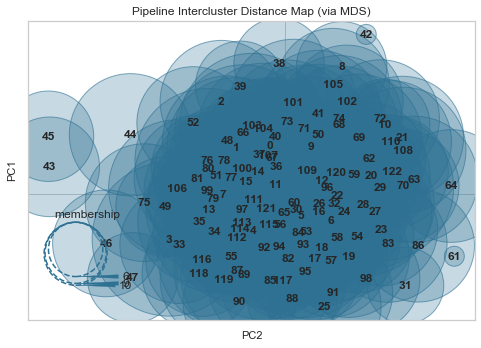

In [63]:
plot_model(ap,plot='distance')

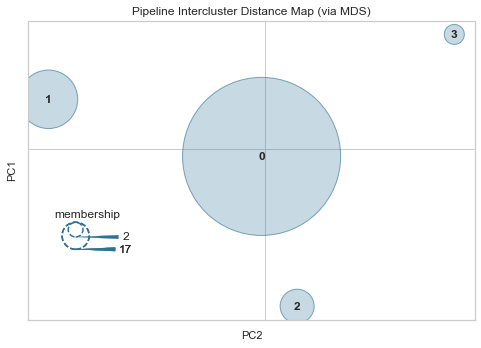

In [64]:
plot_model(meanshift,plot='distance')

In [66]:
predictions = predict_model(meanshift,dataset)
predictions.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,Cluster 0
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,Cluster 0
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,Cluster 0
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,Cluster 0
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m,Cluster 0
